In [26]:
import os
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from palettable.colorbrewer.sequential import YlGn_9
from palettable.wesanderson import Mendl_4

from ideotype.data_process import read_data, agg_sims
from ideotype.analysis import identify_top_phenos, rank_all_phenos, rank_top_phenos
from ideotype.figures import plot_sims_raw, plot_sims_phenostage
from ideotype import DATA_PATH

In [2]:
run_name = 'present'
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates

In [18]:
phenos = np.arange(100)
yield_disps = [np.nan]*len(phenos)

for count, pheno in enumerate(phenos):
    site = df_sites.iloc[25][0]
    yields = df_sims.query(f'site=="{site}"').query(f'cvar=={pheno}')['dm_ear']
    if len(yields) != 0:
        yield_mean = round(np.mean(yields), 2)
        yield_var = round(np.var(yields), 2)
        yield_disp = yield_var/yield_mean
        yield_disps[count] = yield_disp

In [19]:
phenos = np.arange(100)
jday_vars = [np.nan]*len(phenos)

for count, pheno in enumerate(phenos):
    site = df_sites.iloc[25][0]
    df_sub = df_phenology.query(f'site=={site}').query(f'cvar=={pheno}')
    jdays = list(df_sub[df_sub['pheno'] == '"grainFill"']['jday'])
    if len(jdays) != 0:
        jday_var = round(np.var(jdays),2)
        jday_vars[count] = jday_var

In [20]:
df_sims.head()

year  cvar    site        date   jday  time  leaves  mature_lvs  drop_lvs  \
0  1961     0  722080  07/23/1961  22485    14    16.0          16        12   
1  1961     0  722140  07/12/1961  22474     7    16.0          16        13   
2  1961     0  722230  07/13/1961  22475    21    16.0          16        12   
3  1961     0  722260  07/22/1961  22484    18    16.0          16        12   
4  1961     0  722340  07/25/1961  22487     1    16.0          16        12   

       LA  ...  dm_ear  dm_totleaf  dm_dropleaf  df_stem  df_root  roil_rt  \
0  165.60  ...  210.24       18.41        10.05    54.00   37.605   37.614   
1  162.85  ...  174.21       20.02        13.33    56.05   84.828   84.837   
2  156.39  ...  200.08       15.75         8.58    46.09   39.813   39.824   
3  163.60  ...  170.33       16.63         9.04    47.15   90.543   90.557   
4  162.80  ...  199.27       16.51         8.98    46.99   56.190   56.209   

   mx_rootdept  available_water  soluble_c       note  
0          0.0              0.0       0.06  "Matured"  
1          0.0              0.0       0.05  "Matured"  
2          0.0              0.0       0.13  "Matured"  
3          0.0              0.0       0.07  "Matured"  
4          0.0              0.0       0.18  "Matured"  

[5 rows x 53 columns]

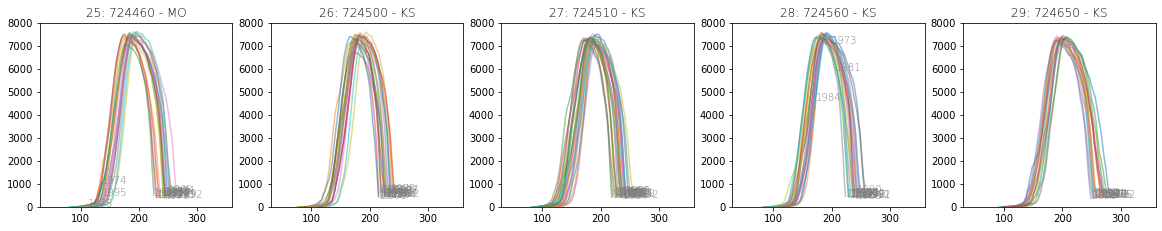

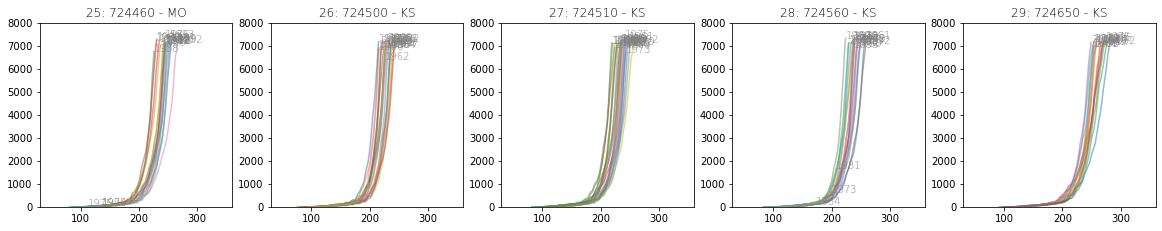

In [220]:
plot_sims_raw('present', pheno, sites, 'LA', 0, 8000)
plot_sims_raw('present', pheno, sites, 'LA_dead', 0, 8000)

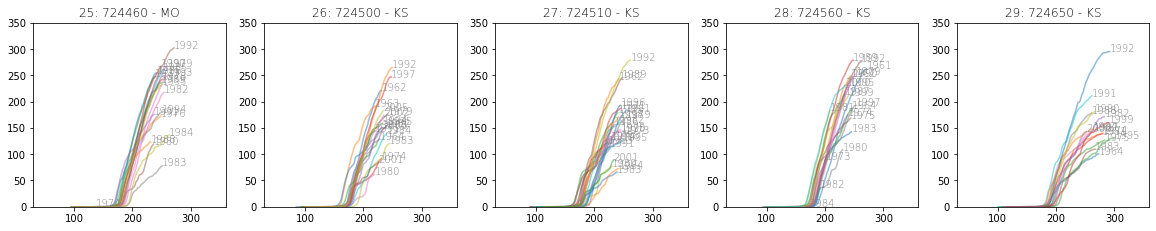

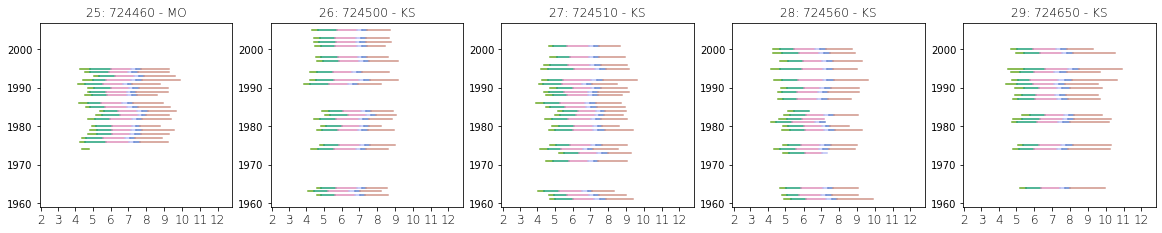

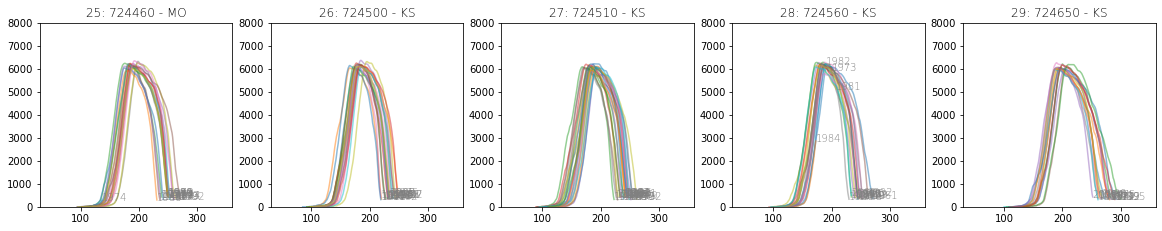

In [211]:
pheno = 38
plot_sims_raw('present', pheno, sites, 'dm_ear', 0, 350)
plot_sims_phenostage('present', pheno, sites, df_sims, df_sites, df_phenology)
plot_sims_raw('present', pheno, sites, 'LA', 0, 8000)

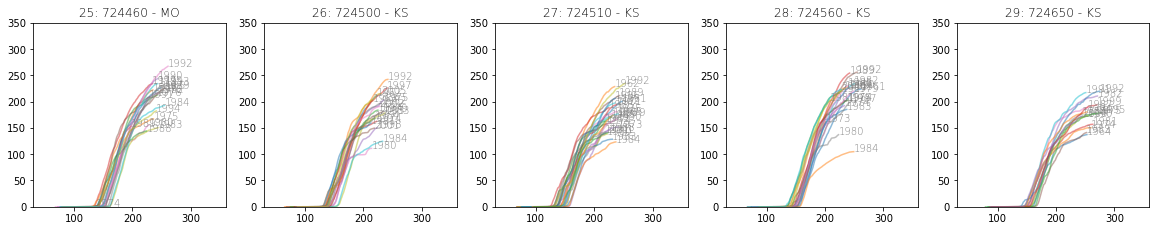

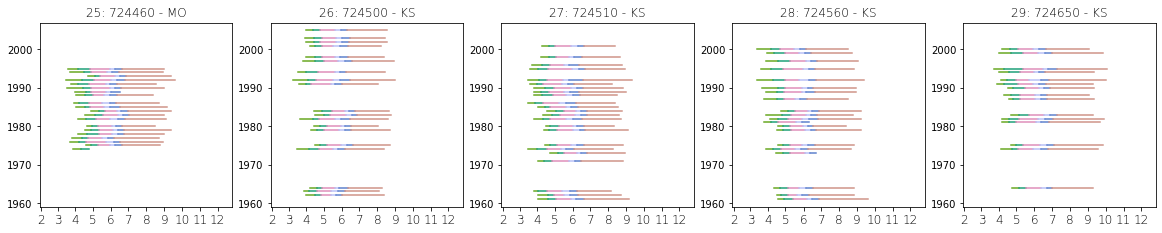

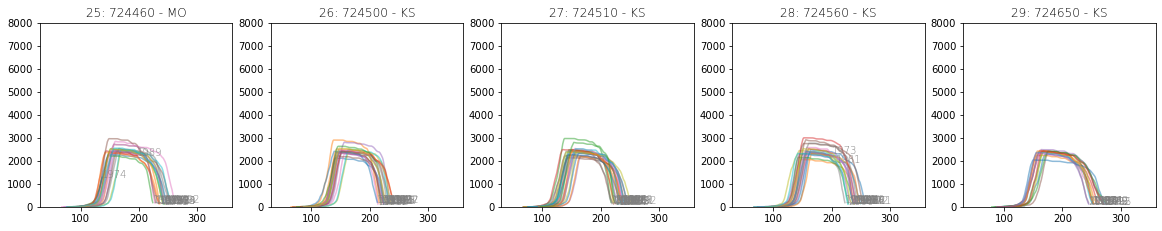

In [212]:
pheno = 65
plot_sims_raw('present', pheno, sites, 'dm_ear', 0, 350)
plot_sims_phenostage('present', pheno, sites, df_sims, df_sites, df_phenology)
plot_sims_raw('present', pheno, sites, 'LA', 0, 8000)

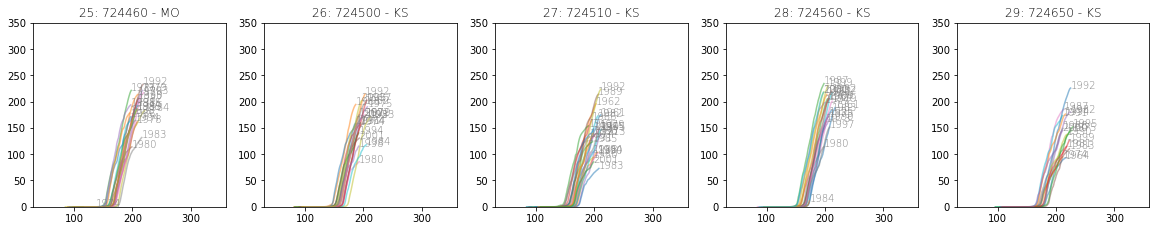

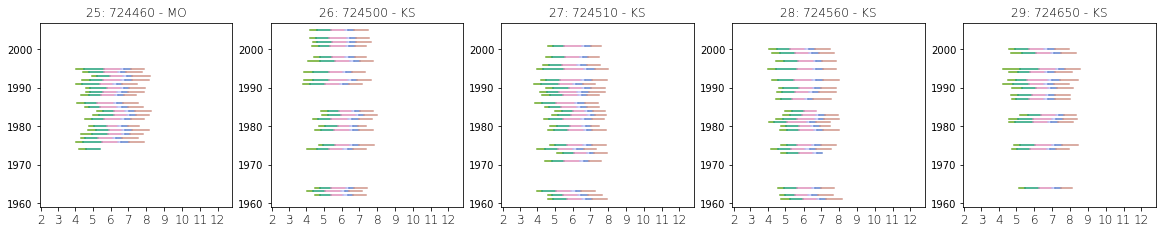

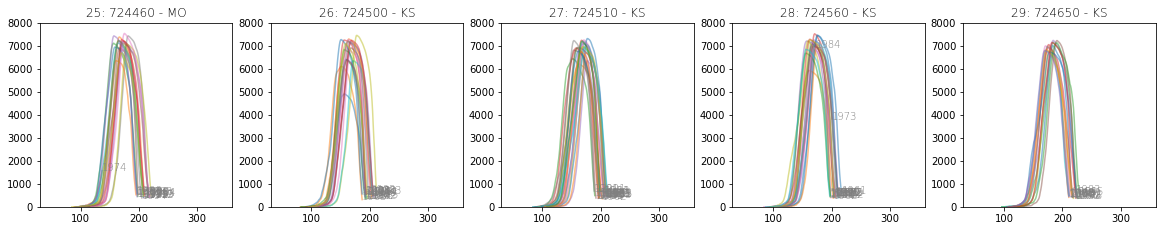

In [210]:
pheno = 5
plot_sims_raw('present', pheno, sites, 'dm_ear', 0, 350)
plot_sims_phenostage('present', pheno, sites, df_sims, df_sites, df_phenology)
plot_sims_raw('present', pheno, sites, 'LA', 0, 8000)

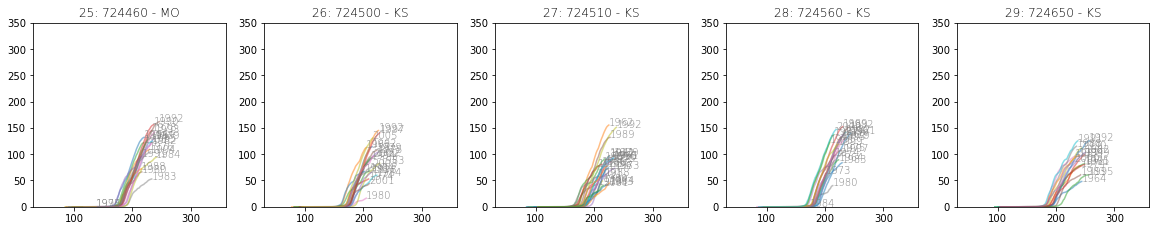

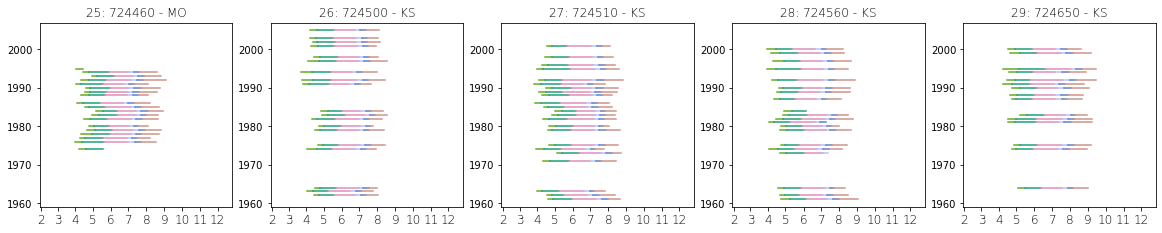

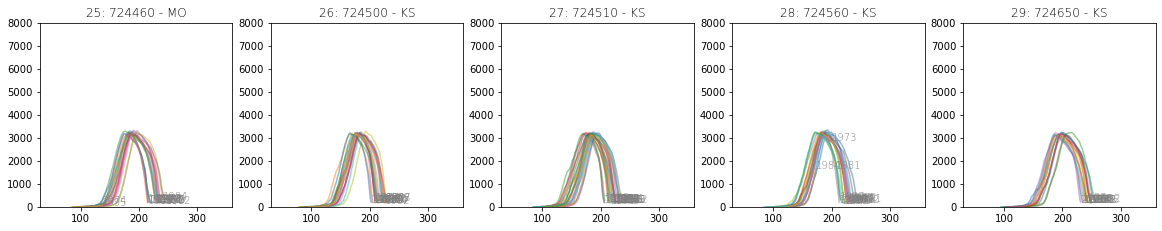

In [226]:
pheno = 82
plot_sims_raw('present', pheno, sites, 'dm_ear', 0, 350)
plot_sims_phenostage('present', pheno, sites, df_sims, df_sites, df_phenology)
plot_sims_raw('present', pheno, sites, 'LA', 0, 8000)

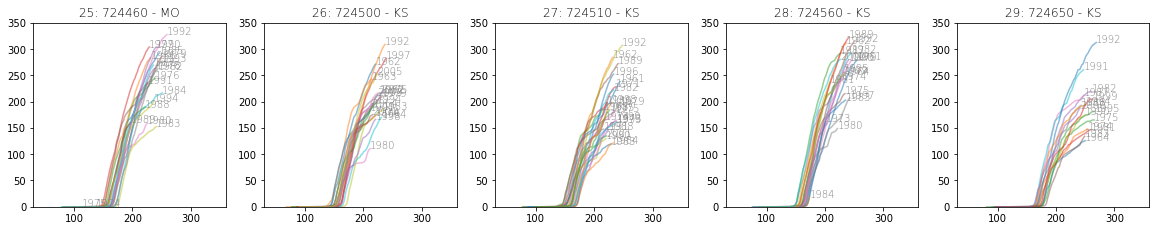

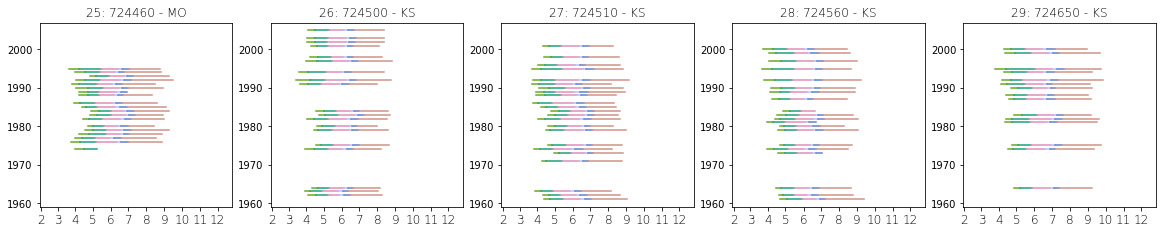

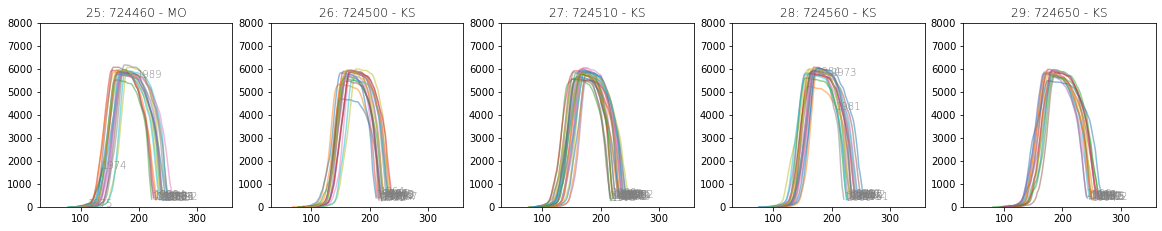

In [214]:
pheno = 9
plot_sims_raw('present', pheno, sites, 'dm_ear', 0, 350)
plot_sims_phenostage('present', pheno, sites, df_sims, df_sites, df_phenology)
plot_sims_raw('present', pheno, sites, 'LA', 0, 8000)

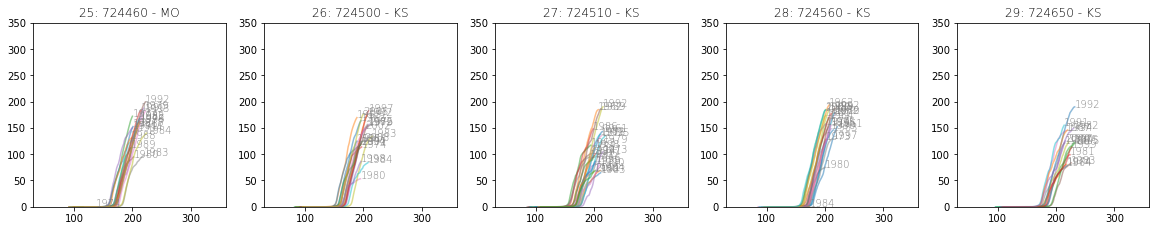

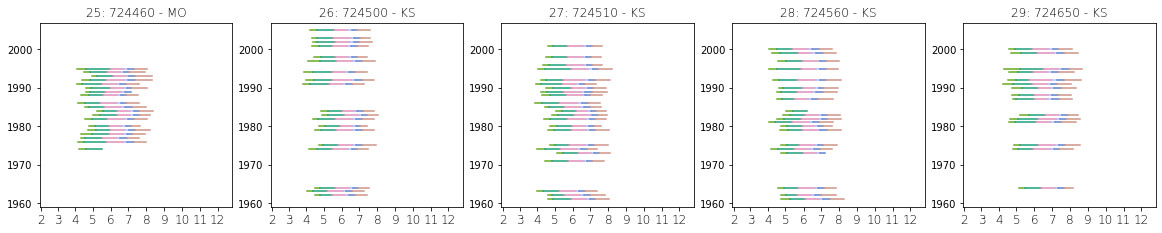

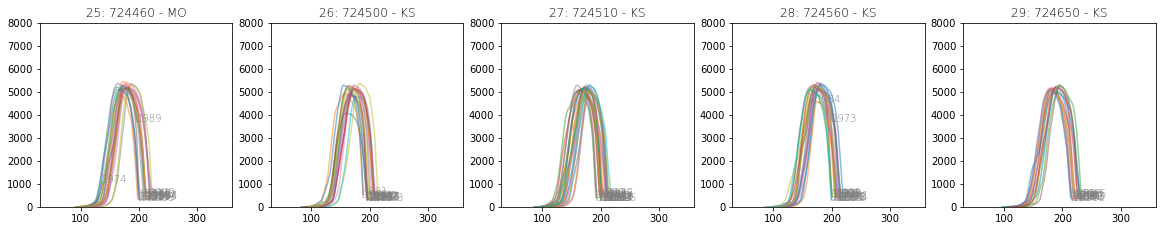

In [213]:
pheno = 85
plot_sims_raw('present', pheno, sites, 'dm_ear', 0, 350)
plot_sims_phenostage('present', pheno, sites, df_sims, df_sites, df_phenology)
plot_sims_raw('present', pheno, sites, 'LA', 0, 8000)

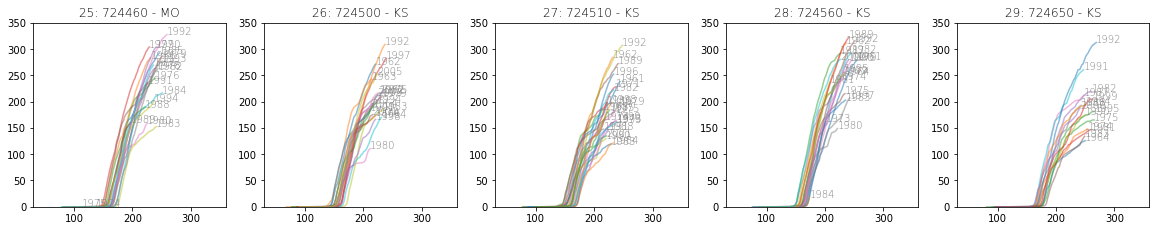

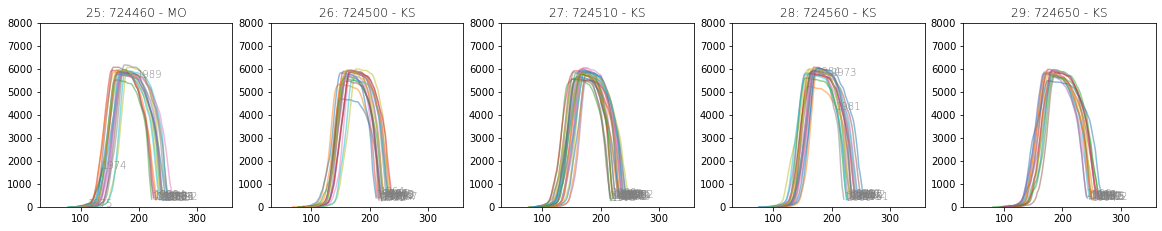

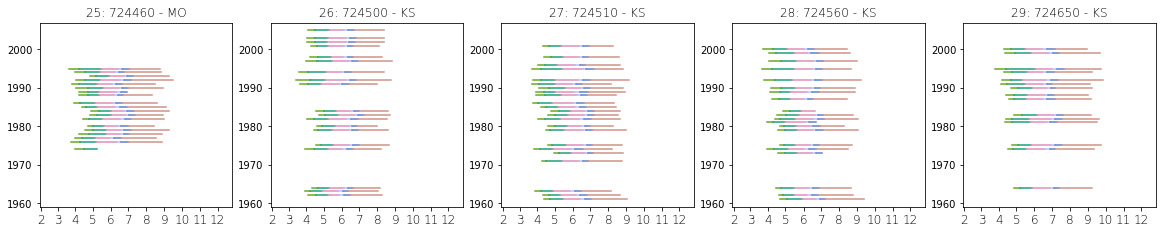

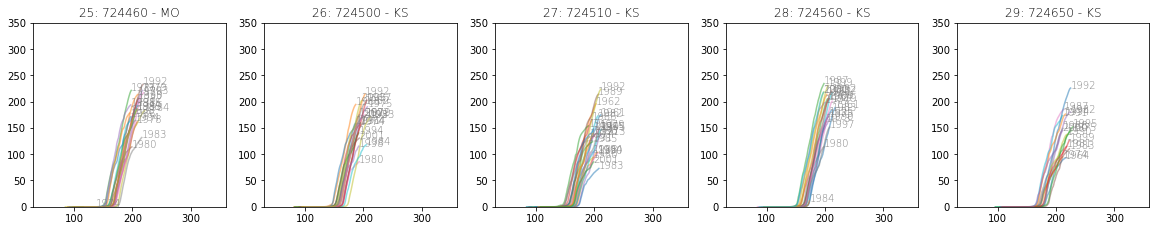

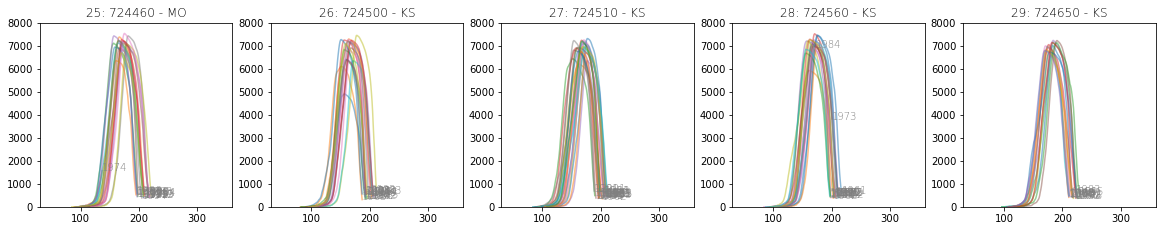

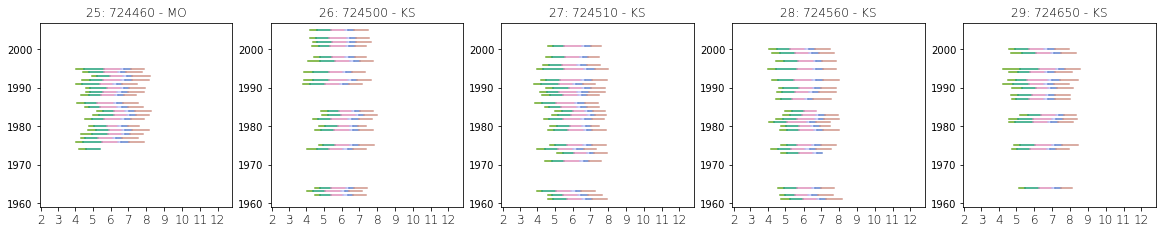

In [207]:
# 9 & 5: phenotypes with high leaf number, high total leaf area, yet medium dispersion
# 9: higher staygreen
# 5: lower staygreen
sites = [25,26,27,28,29]
plot_sims_raw('present', 9, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 9, sites, 'LA', 0, 8000)
plot_sims_phenostage('present', 9, sites, df_sims, df_sites, df_phenology)
plot_sims_raw('present', 5, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 5, sites, 'LA', 0, 8000)
plot_sims_phenostage('present', 5, sites, df_sims, df_sites, df_phenology)

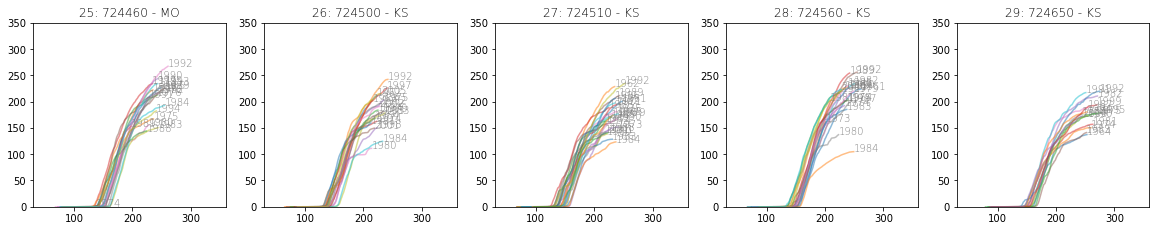

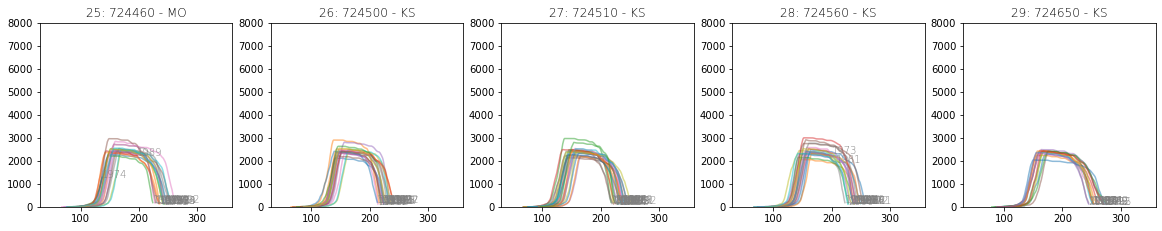

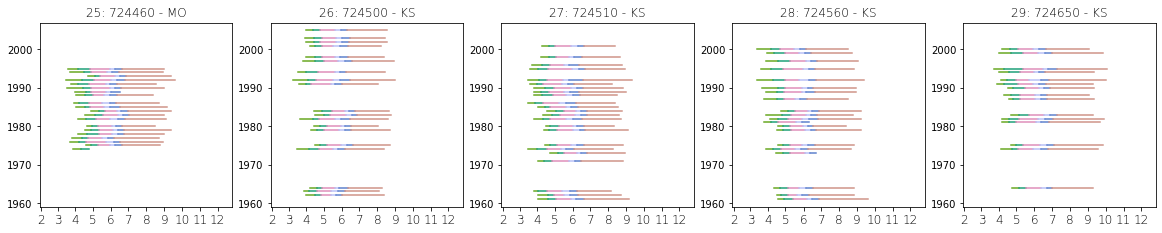

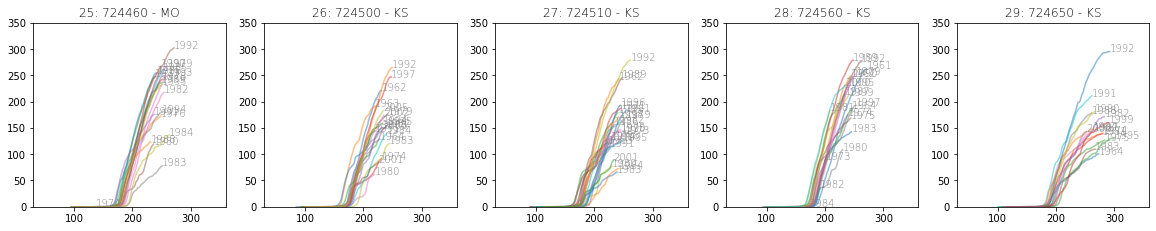

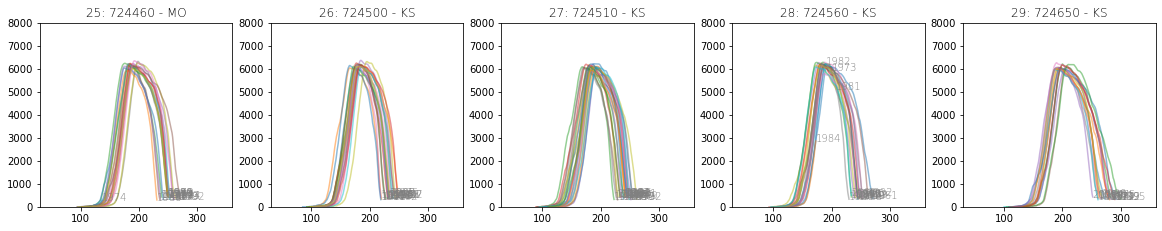

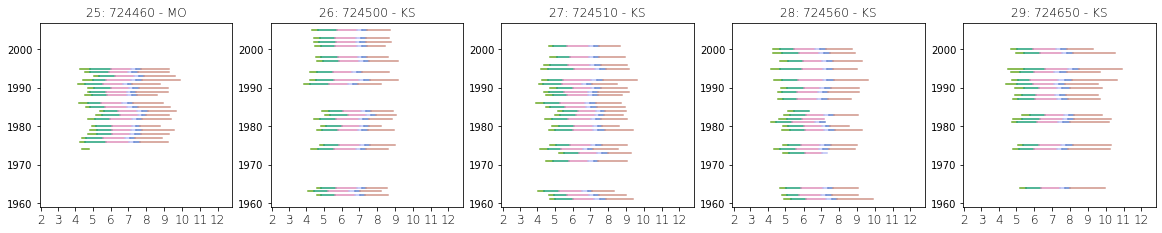

In [6]:
# 65: high yield low dispersion -> high performance
# 38: high yield high dispersion -> low performance
sites = [25,26,27,28,29]
plot_sims_raw('present', 65, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 65, sites, 'LA', 0, 8000)
plot_sims_phenostage('present', 65, sites, df_sims, df_sites, df_phenology)
plot_sims_raw('present', 38, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 38, sites, 'LA', 0, 8000)
plot_sims_phenostage('present', 38, sites, df_sims, df_sites, df_phenology)

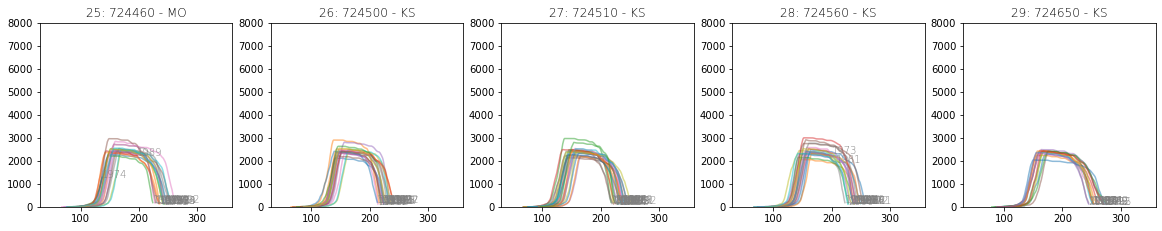

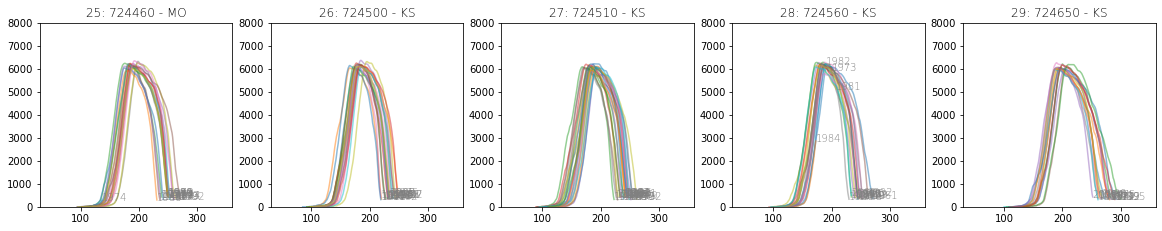

In [4]:
plot_sims_raw('present', 65, sites, 'LA', 0, 8000)
plot_sims_raw('present', 38, sites, 'LA', 0, 8000)


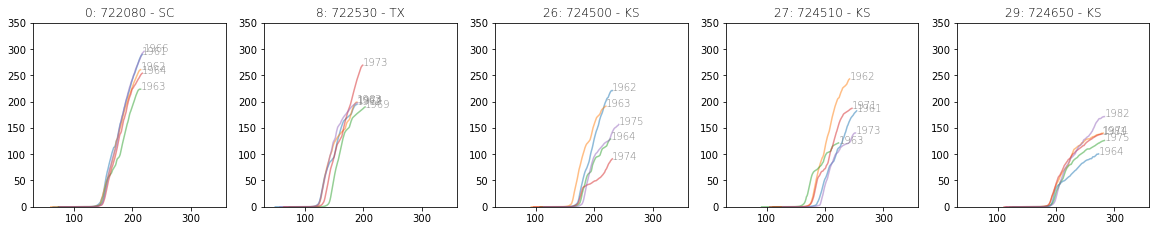

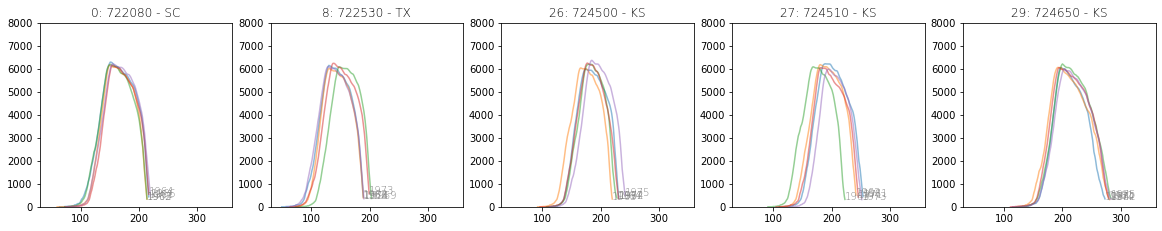

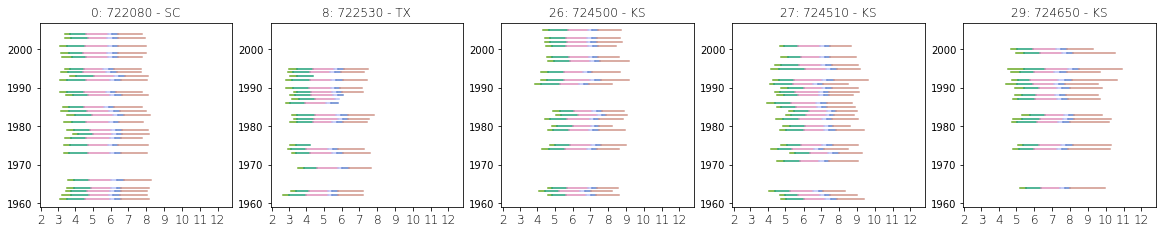

In [15]:
# 38: pheno with high yield & high dispersion
plot_sims_raw('present', 38, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 38, sites, 'LA', 0, 8000)
plot_sims_phenostage('present', 38, sites, df_sims, df_sites, df_phenology)

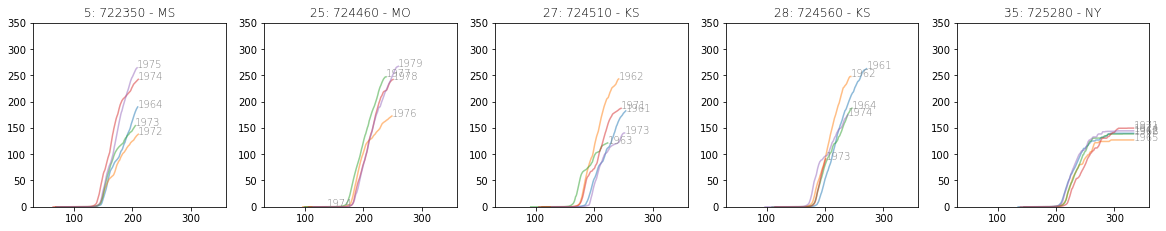

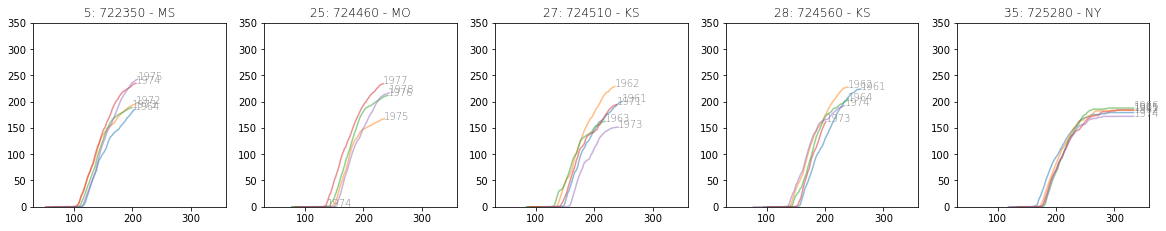

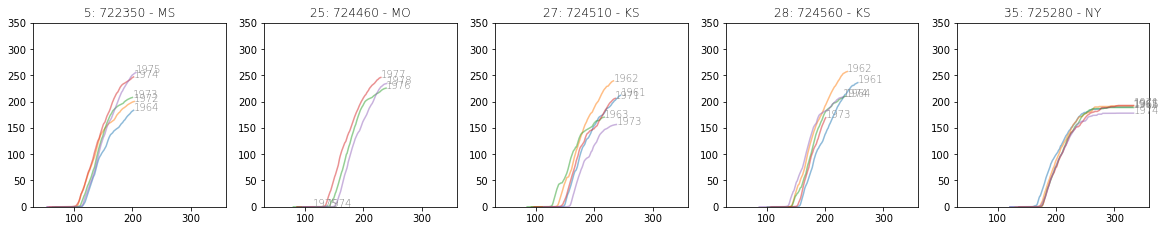

In [3]:
sites = [5,25,27,28,35]
plot_sims_raw('present', 38, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 65, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 4, sites, 'dm_ear', 0, 350)

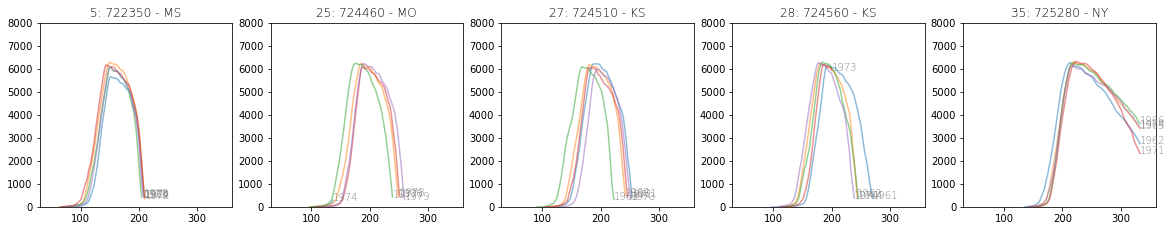

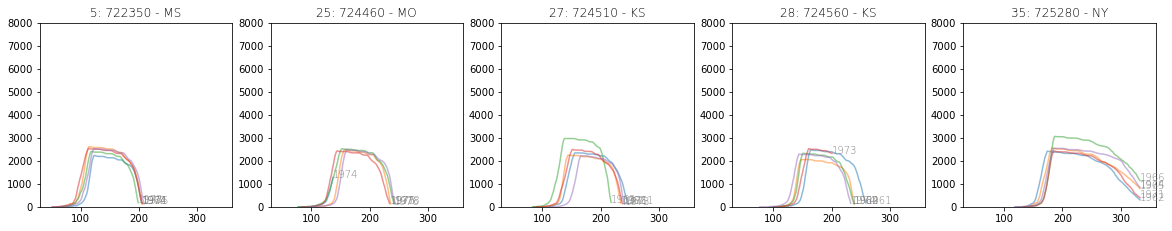

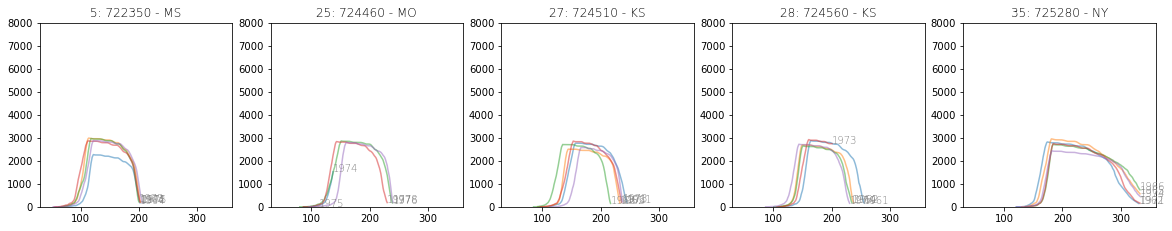

In [5]:
plot_sims_raw('present', 38, sites, 'LA', 0, 8000)
plot_sims_raw('present', 65, sites, 'LA', 0, 8000)
plot_sims_raw('present', 4, sites, 'LA', 0, 8000)

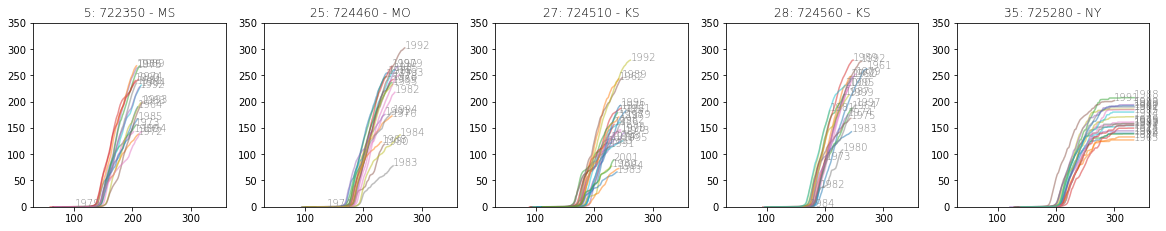

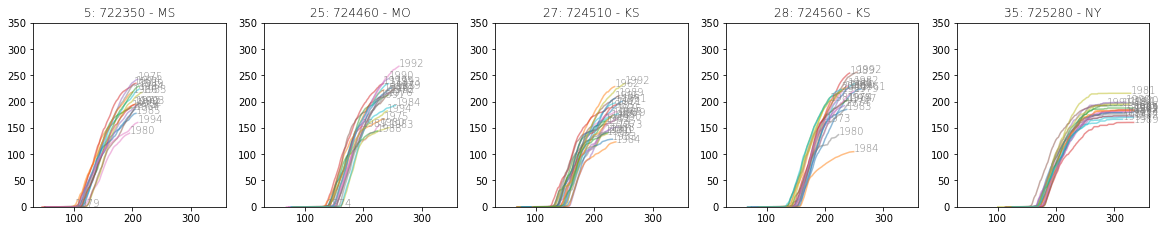

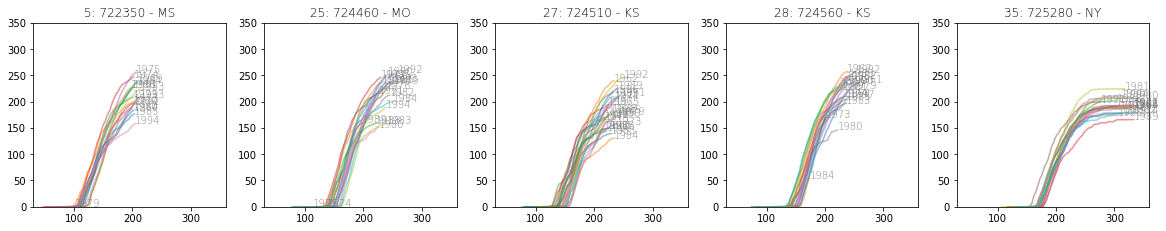

In [7]:
sites = [5,25,27,28,35]
plot_sims_raw('present', 38, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 65, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 4, sites, 'dm_ear', 0, 350)

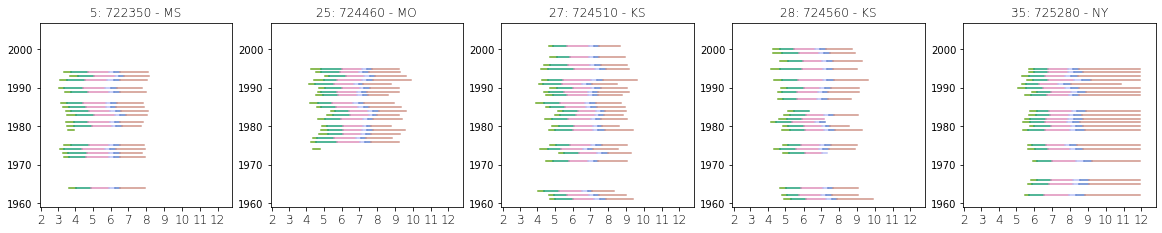

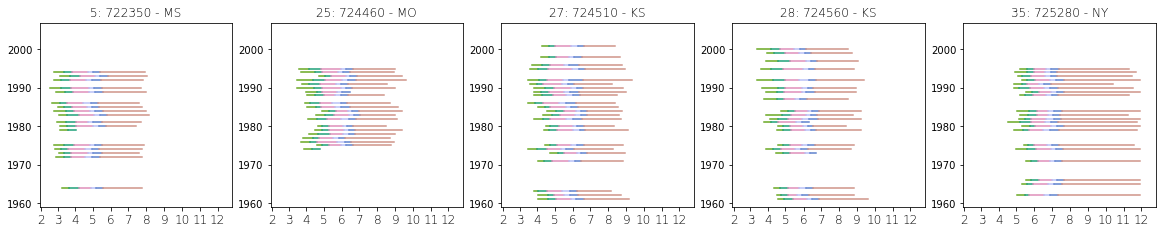

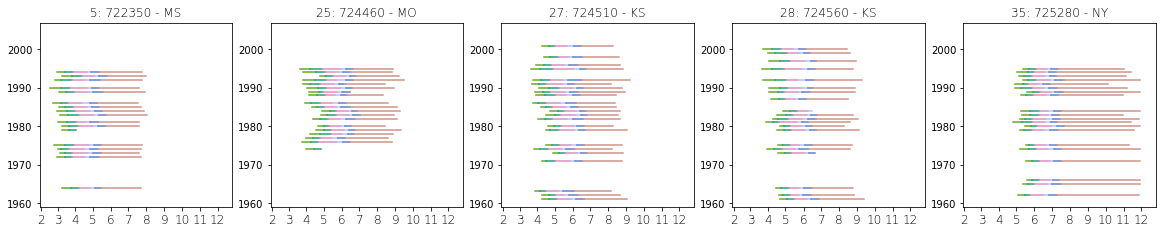

In [9]:
sites = [5,25,27,28,35]
plot_sims_phenostage('present', 38, sites, df_sims, df_sites, df_phenology)
plot_sims_phenostage('present', 65, sites, df_sims, df_sites, df_phenology)
plot_sims_phenostage('present', 4, sites, df_sims, df_sites, df_phenology)

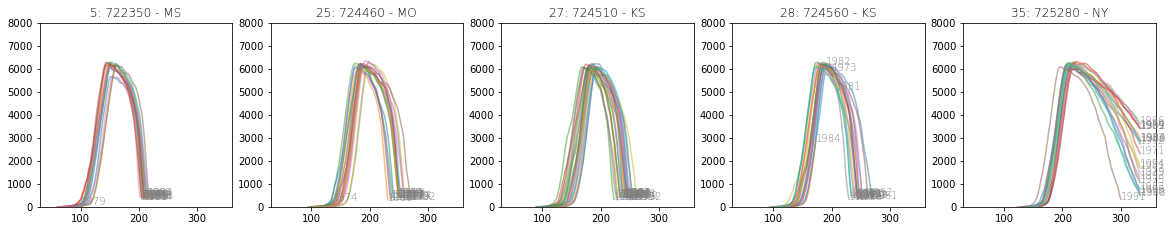

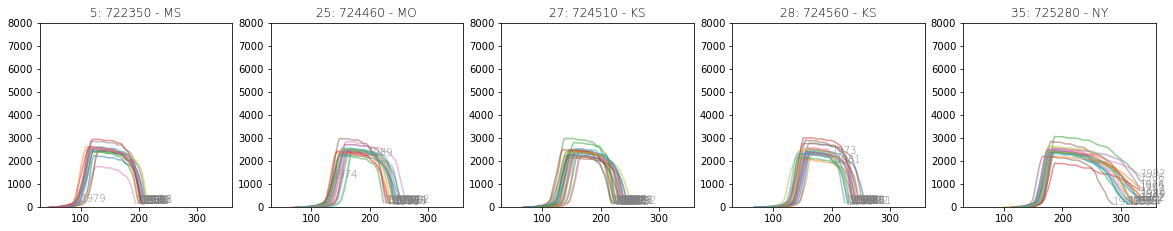

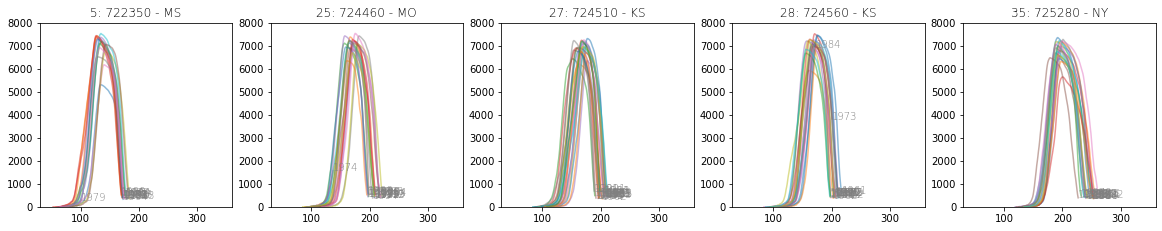

In [11]:
plot_sims_raw('present', 38, sites, 'LA', 0, 8000)
plot_sims_raw('present', 65, sites, 'LA', 0, 8000)
plot_sims_raw('present', 5, sites, 'LA', 0, 8000)

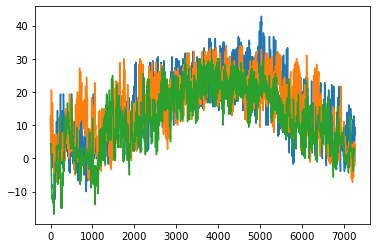

In [21]:
df_wea1 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/data/control/724560_1984.txt', sep='\t')
df_wea2 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/data/control/724560_1992.txt', sep='\t')
df_wea3 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/data/control/725280_1981.txt', sep='\t')

plt.plot(df_wea1.temp)
plt.plot(df_wea2.temp)
plt.plot(df_wea3.temp)

In [ ]:
sites = [5,25,27,28,35]
plot_sims_raw('present', 38, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 38, sites, 'LA', 0, 8000)
plot_sims_raw('present', 38, sites, 'leaves', 0, 23)
plot_sims_raw('present', 38, sites, 'An_sunlit', 0, 70)
plot_sims_phenostage('present', 38, sites, df_sims, df_sites, df_phenology)

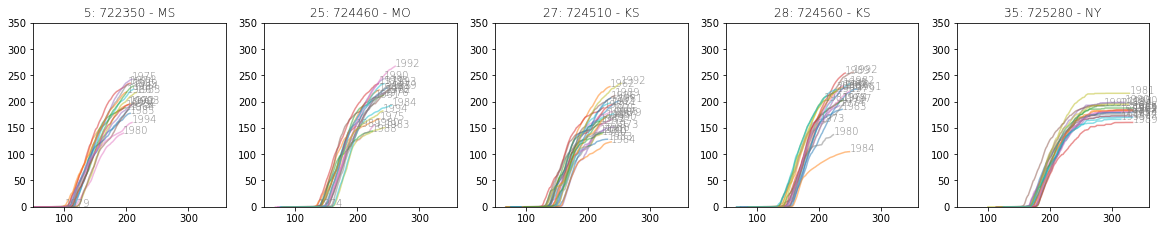

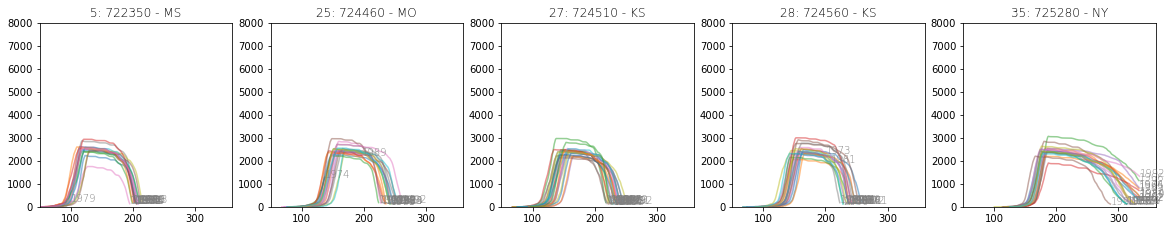

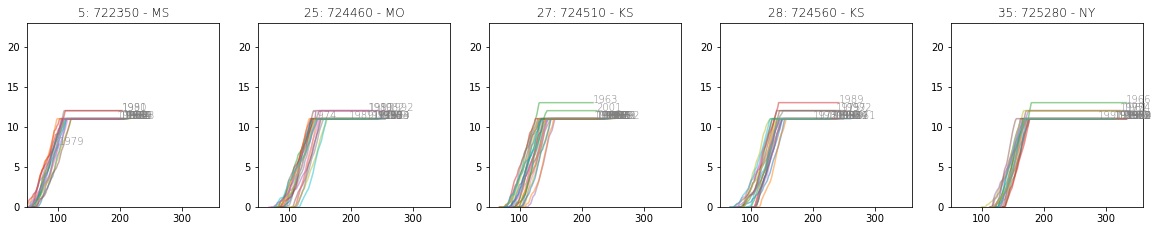

In [10]:
plot_sims_raw('present', 65, sites, 'dm_ear', 0, 350)
plot_sims_raw('present', 65, sites, 'LA', 0, 8000)
plot_sims_raw('present', 65, sites, 'leaves', 0, 23)

In [3]:
def plot_yield_maps(phenos):
    extent = [-123, -72, 19, 53]
    df_sub = df_all.groupby(['cvar', 'site']).mean().reset_index()

    fig = plt.figure(figsize=(16,10))

    for count, cvar in enumerate(phenos):
        ax = fig.add_subplot(4,5,count+1, projection=ccrs.AlbersEqualArea(
            central_latitude=39.5, central_longitude=-98.35))
        df = df_sub[df_sub.cvar == cvar]
        ax.scatter(df.lon, df.lat, 
                   transform=ccrs.PlateCarree(), 
                   s=30, c=df.dm_ear, 
                   cmap=YlGn_9.mpl_colormap,
                   vmin=80, vmax=250, alpha=0.8)
        ax.set_extent(extent)
        ax.add_feature(cfeature.BORDERS, edgecolor='grey')
        ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
        ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
        ax.set_title(cvar, fontweight='light')

    fig.subplots_adjust(wspace=0)

In [4]:
def plot_disp_maps(phenos):
    # calculate yield dispersion
    groups = ['cvar', 'site']
    sim = 'dm_ear'
    mx_mean = agg_sims(df_all, groups, 'mean', sim)
    mx_variance = agg_sims(df_all, groups, 'variance', sim)
    mx_disp = np.divide(mx_variance, mx_mean)
    df_yield_disp = pd.DataFrame(mx_disp)
    df_grouped = df_all.groupby(['cvar', 'site']).mean().reset_index()

    # set map extent
    extent = [-123, -72, 19, 53]

    # set fig size
    fig = plt.figure(figsize=(16,10))

    # iterate through phenos
    for count, pheno in enumerate(phenos):
        # subset df
        df_sub = df_grouped[df_grouped.cvar == pheno]

        # scatter plot
        ax = fig.add_subplot(4,5,count+1, projection=ccrs.AlbersEqualArea(
            central_latitude=39.5, central_longitude=-98.35))
        ax.scatter(df_sub.lon, df_sub.lat, 
                   transform=ccrs.PlateCarree(), 
                   s=30, c=df_yield_disp.iloc[pheno,:],
                   cmap='PuRd',
                   vmin=0, vmax=25, alpha=0.8)
        ax.set_extent(extent)
        ax.add_feature(cfeature.BORDERS, edgecolor='grey')
        ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
        ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
        ax.set_title(pheno, fontweight='light')

    fig.subplots_adjust(wspace=0)    

In [5]:
def plot_yield_disp(phenos):
    # calculate yield dispersion
    groups = ['cvar', 'site']
    sim = 'dm_ear'
    mx_mean = agg_sims(df_all, groups, 'mean', sim)
    mx_variance = agg_sims(df_all, groups, 'variance', sim)
    mx_disp = np.divide(mx_variance, mx_mean)
    df_yield_mean = pd.DataFrame(mx_mean)
    df_yield_disp = pd.DataFrame(mx_disp)
        
    # set fig size
    fig = plt.figure(figsize=(16,10))
    
    # iterate through phenos
    for count, pheno in enumerate(phenos):
        ax = fig.add_subplot(4, 5, count+1)
        yield_means = df_yield_mean.iloc[pheno, :]
        yield_disps = df_yield_disp.iloc[pheno, :]
        ax.scatter(yield_means, yield_disps, c='grey', alpha=0.5)
        ax.set_title(pheno, fontweight='light')
        
        for item in np.arange(len(yield_means)):
            ax.annotate(item, (yield_means[item], yield_disps[item]), color='grey')

        ax.set_xlim(50,280)
        ax.set_ylim(0,45)


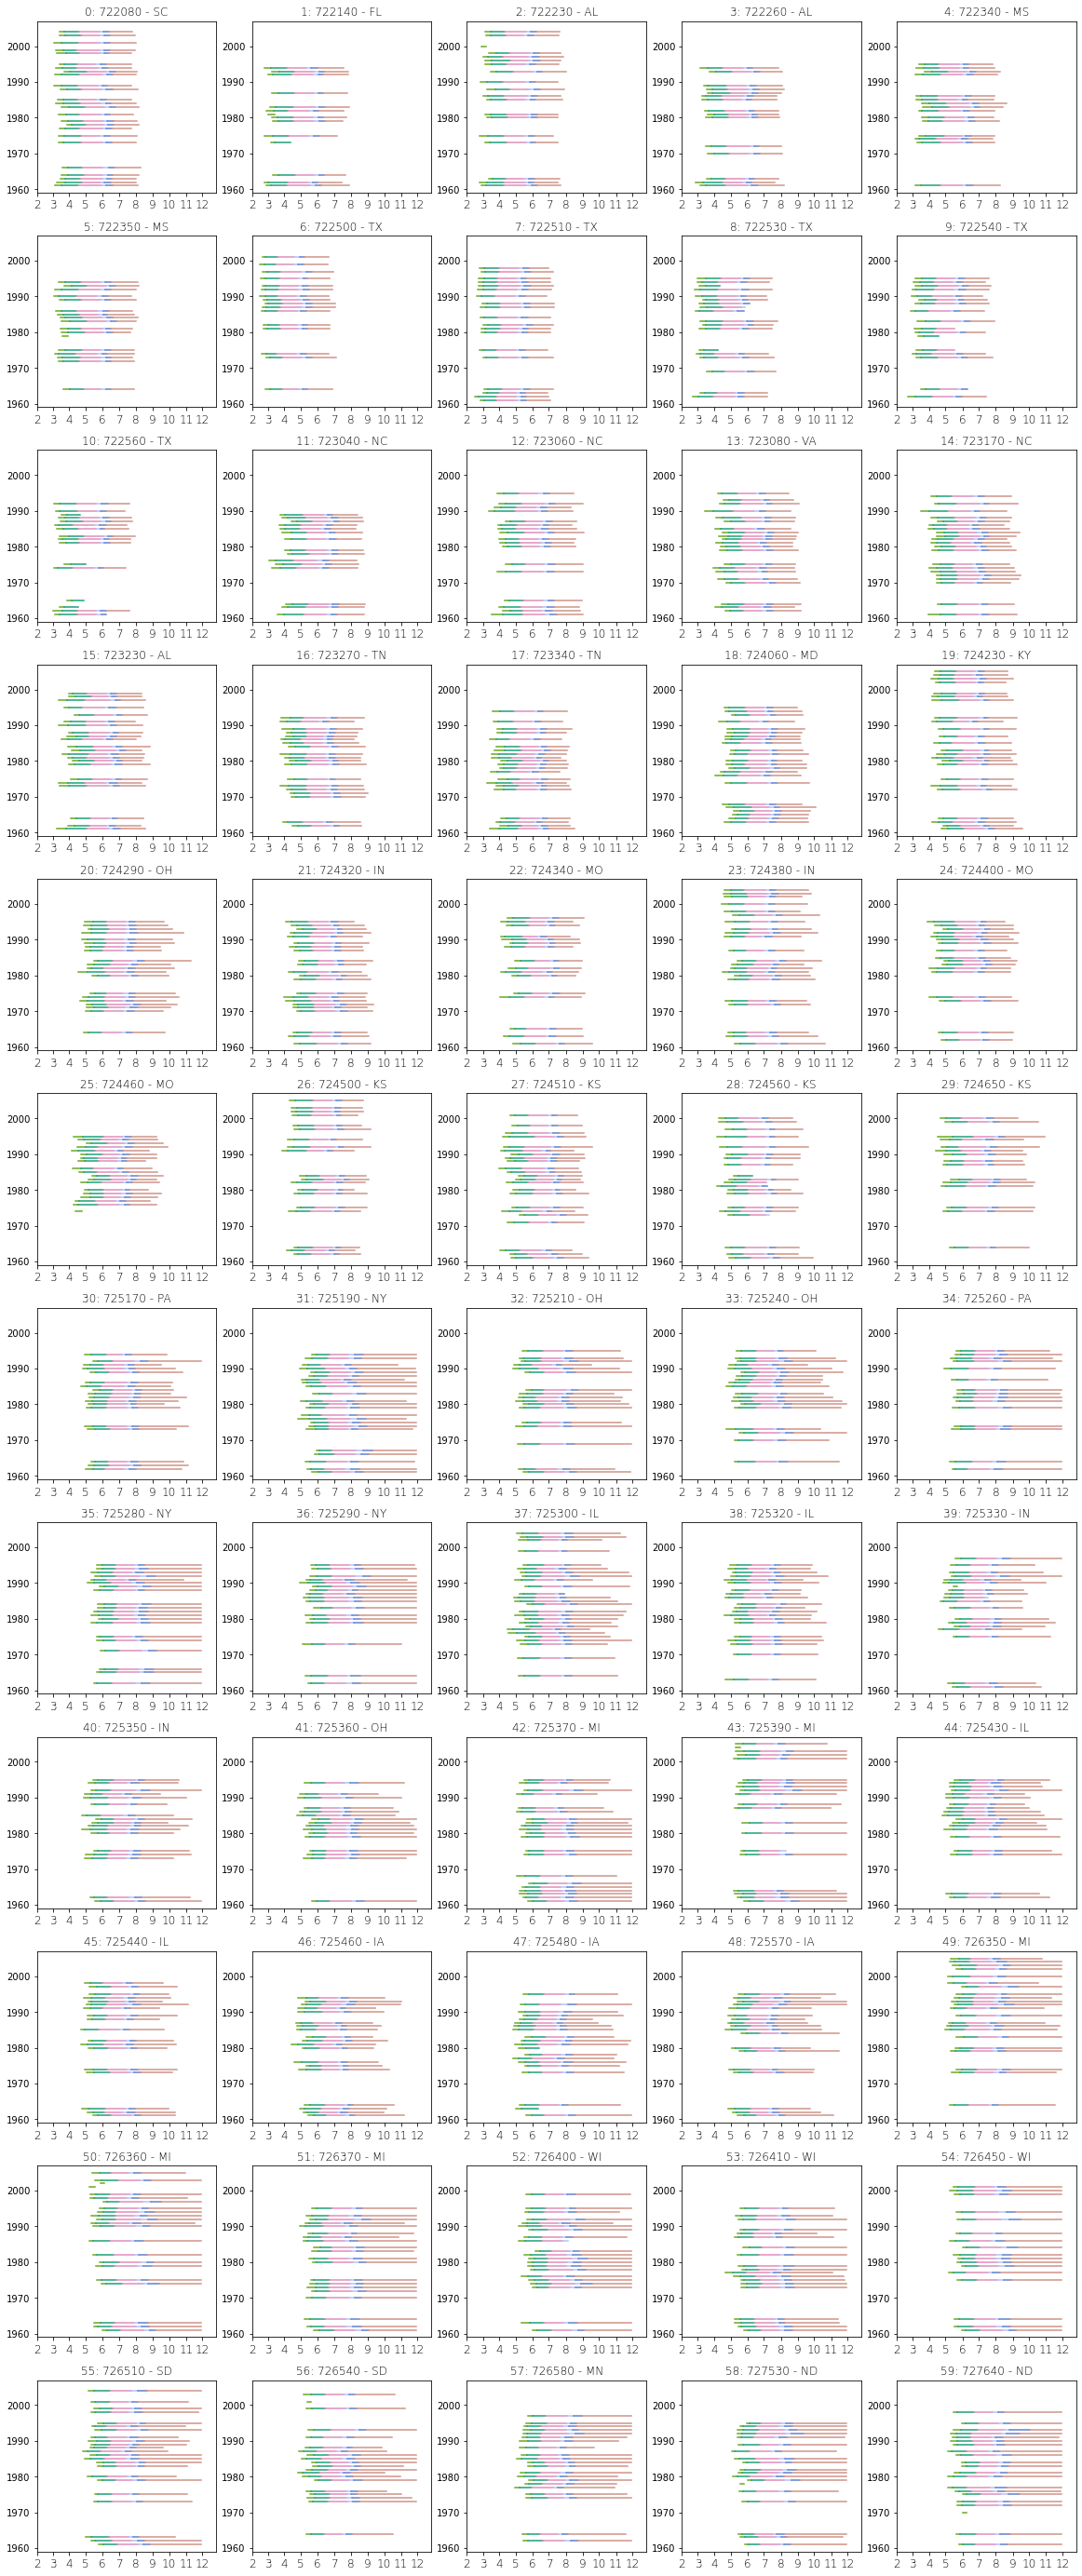

In [8]:
plot_sims_phenostage('present', 38, np.arange(60), df_sims, df_sites, df_phenology)

In [ ]:
# Yield
df_sims = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_yield.csv'))
dm_ears = df_sims.groupby('cvar').mean()['yield']
ears = [dm_ears[pheno] for pheno in phenos_ranked]

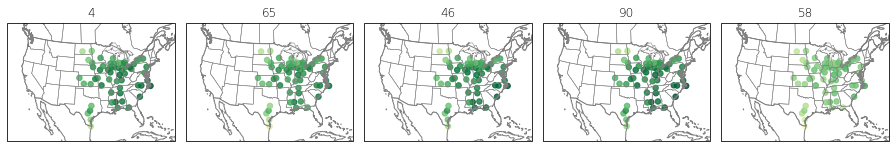

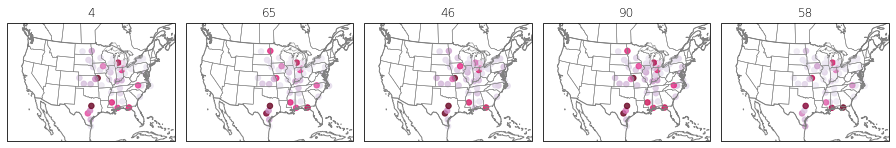

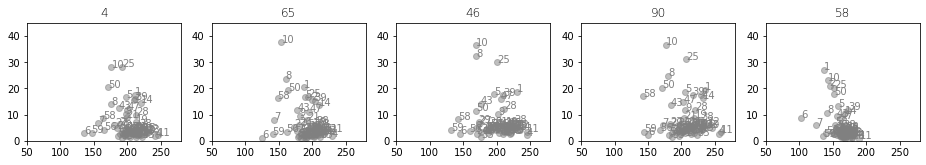

In [104]:
phenos = [4,65,46,90,58]
plot_yield_maps(phenos)
plot_disp_maps(phenos)
plot_yield_disp(phenos)

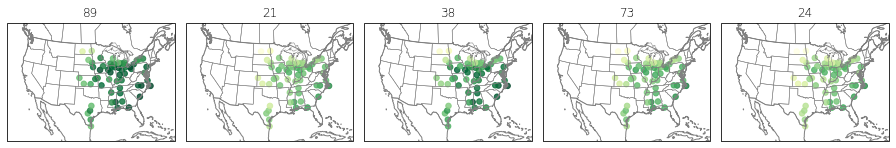

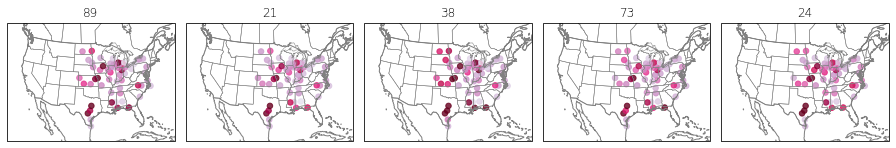

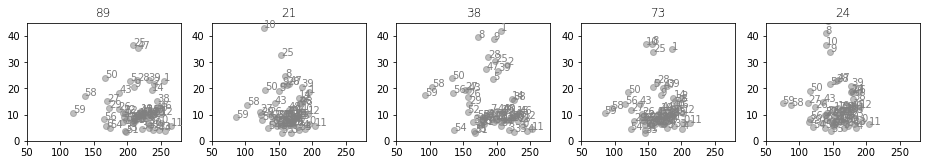

In [105]:
phenos = [89,21,38,73,24]
plot_yield_maps(phenos)
plot_disp_maps(phenos)
plot_yield_disp(phenos)

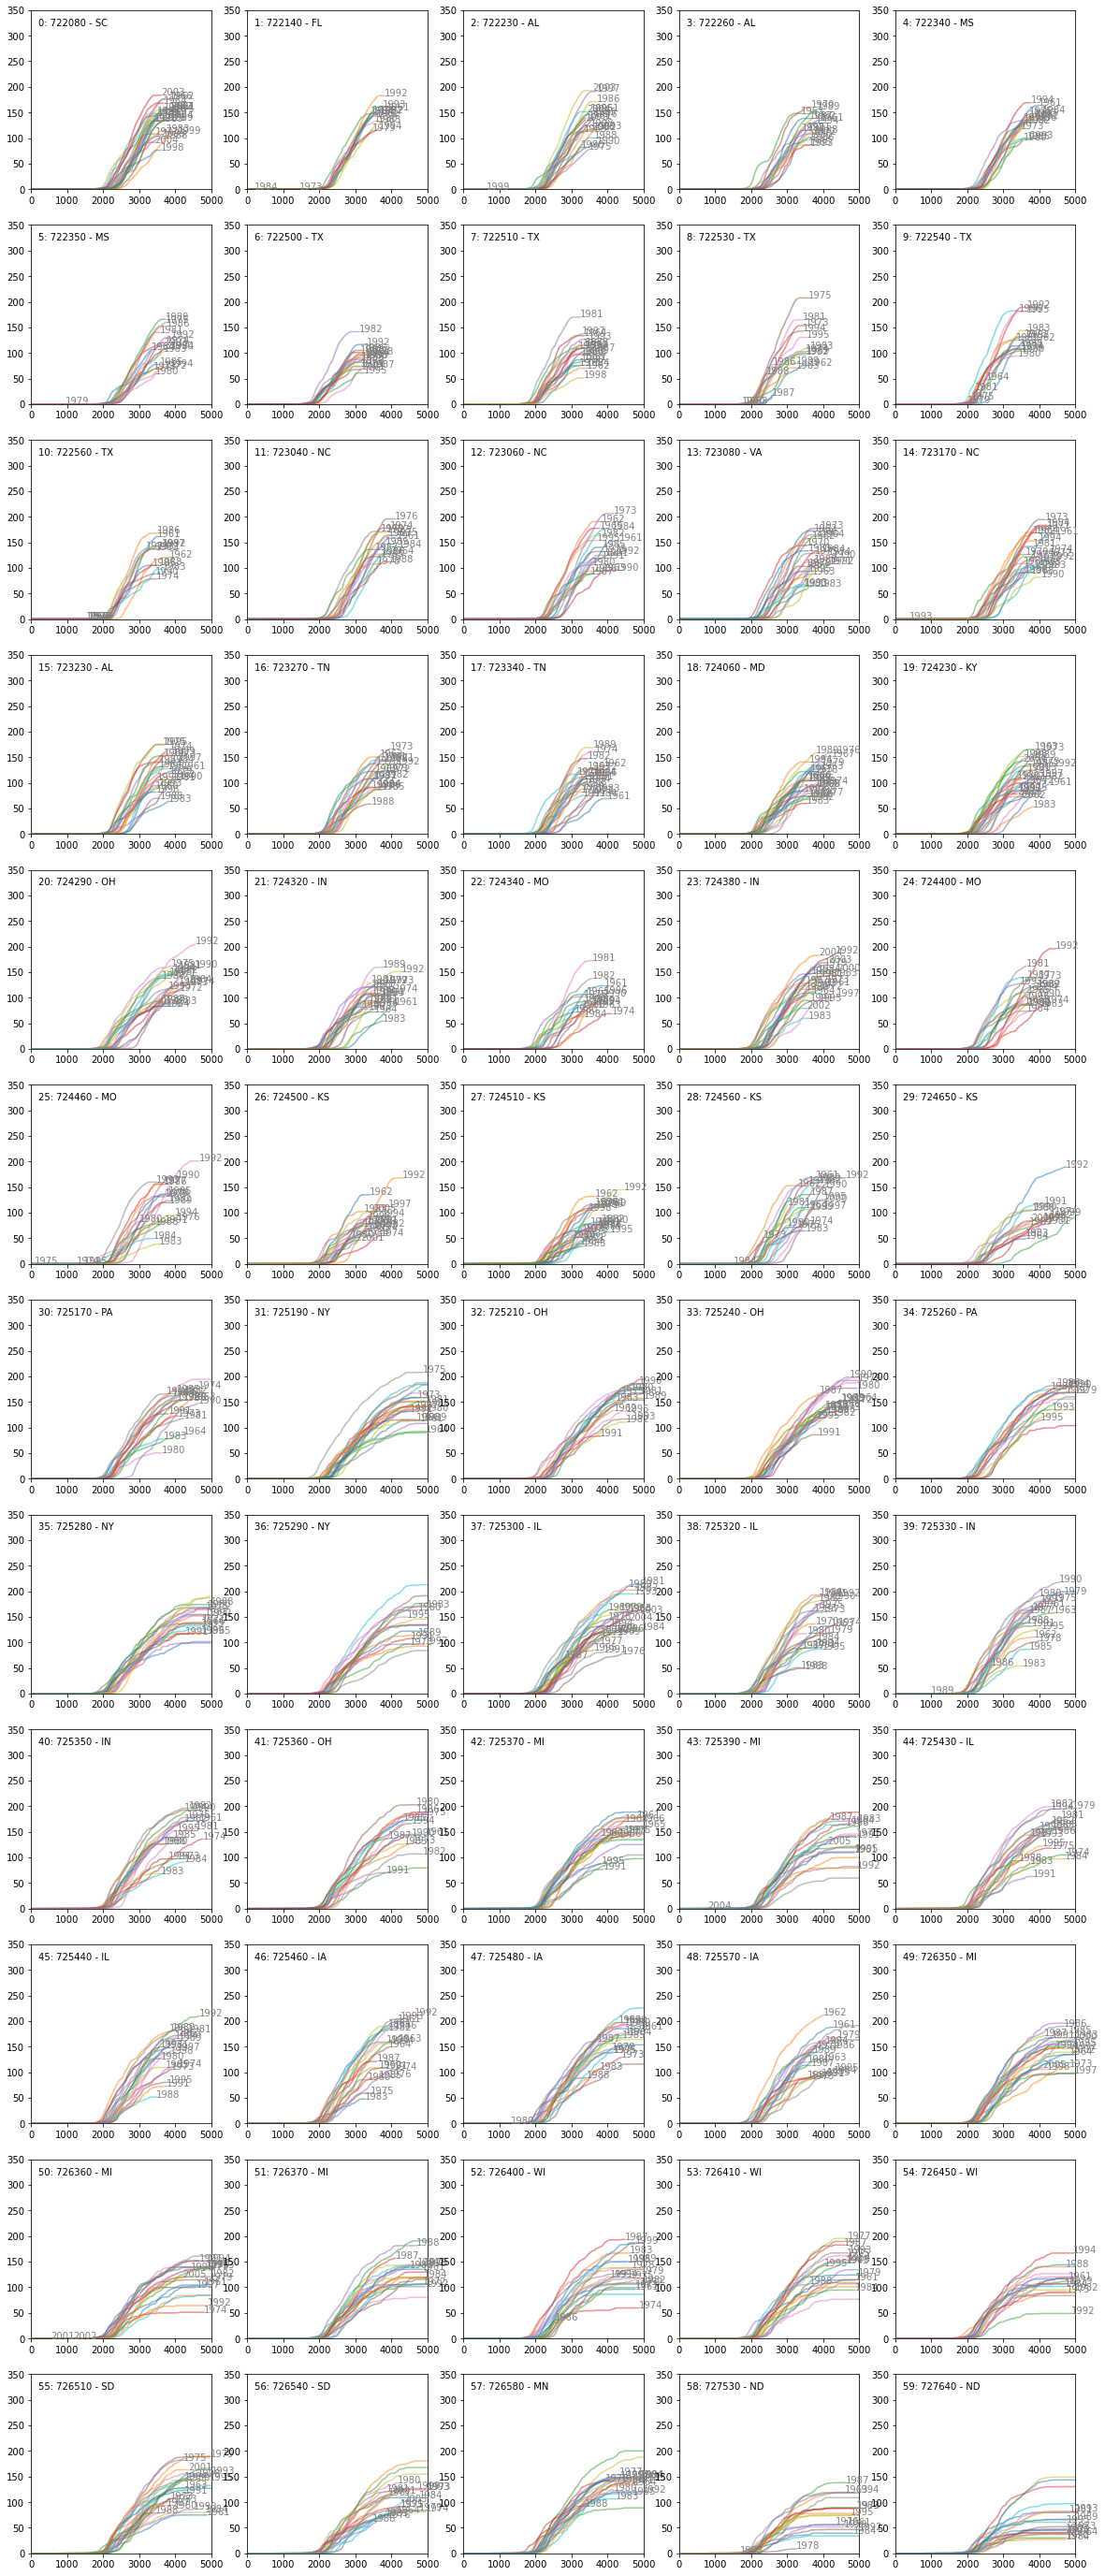

In [8]:
make_simfig('present', 83)